In [1]:
cd D:\User-Majid\Projects\DeepProtein

D:\User-Majid\Projects\DeepProtein


In [2]:
import pickle
import random
import keras
from keras.preprocessing.text import Tokenizer
import numpy as np

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [4]:
f = open("data.pkl", 'rb')
rawProt = pickle.load(f)
f.close()

In [5]:
with open("labels.pkl", 'rb') as f:
  labels = pickle.load(f)

labels = np.reshape(labels, 400000)

In [6]:
prots = np.reshape(rawProt, 400000)
#Here Im gonna remove the duplicates in the following pythonic way: unique = np.unique(array, axis=0)
print(len(np.unique(prots)))
prots, indices = np.unique(prots, return_index=True)
labels = labels[indices]
print(len(labels))
#now remove the ones containing
removals = ['B', 'J', 'O', 'U', 'X', 'Z']
lst = []
y = []
for i in range(len(prots)):
  if not(any(toberemoved in prots[i] for toberemoved in removals)):
    lst.append(prots[i])
    y.append(labels[i])
 
print(len(lst))
ppd = np.array(lst, dtype=object) #ppd for Polished Protein Data
labels = np.array(y, dtype=np.uint8)
del y
print(ppd.shape)
print(labels.dtype)

335112
335112
333071
(333071,)
uint8


In [7]:
#add space for the tokenizer's seperator
def add_space(string):
  return ' '.join(string)

for i in range(len(ppd)):
  ppd[i] = add_space(ppd[i])

In [8]:
alphabet = 'A C D E F G H I K L M N P Q R S T V W Y'
t = Tokenizer(num_words=20, split=" ")
t.fit_on_texts([alphabet])
seq = t.texts_to_sequences(ppd)
type(seq)

list

In [9]:
from keras.preprocessing.sequence import pad_sequences
ppd = pad_sequences(seq, padding='post')

In [10]:
del seq


In [11]:
#split train and test data set
#will have 266457 train data and 66614 test data
#could not use sklearn.model_selection.train_test_split because of memory
X_train, X_test = ppd[:266458], ppd[266458:]
y_train, y_test = labels[:266458], labels[266458:]

In [12]:
def one_hotter(arr):
    hot = np.zeros((12681, 20))
    for i in range(12681):
        if arr[i] != 0:
            hot[i, arr[i]-1] = 1
    return hot.flatten()


def generator(array, labels, batch_size=10):
    i = 0
    while i <= 266457:
        subarray = array[i: i+batch_size]
        sublabels = labels[i: i+batch_size]
        one_hotted = np.apply_along_axis(one_hotter, axis=1, arr=subarray)
        i = i + batch_size
        yield one_hotted, sublabels 

In [13]:
ht = np.zeros((12681, 20))
tst = X_train[0:300, :]  # 300 is the maximum number of elements that could be preprocessed without running out of memory
a = np.apply_along_axis(one_hotter, axis=1, arr=tst)
print(a[4, 7], a.shape)
print(X_train[4, 7])

0.0 (300, 253620)
18


In [14]:
#creating the model:
def create_model():
    model = Sequential()
    model.add(Dense(200, input_dim=253620, activation='relu'))
    model.add(Dense(1, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               50724200  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 50,724,401
Trainable params: 50,724,401
Non-trainable params: 0
_________________________________________________________________
None
batch 1
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 7s 165ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 107ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 106ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45

45/45 [==============================] - 5s 103ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 25
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 26
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 27
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======

45/45 [==============================] - 5s 103ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 50
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 51
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 52
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

45/45 [==============================] - 5s 103ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 75
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 76
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 77
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

45/45 [==============================] - 5s 102ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 100
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 101
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 108ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 102
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

45/45 [==============================] - 5s 104ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 125
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 126
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 127
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 150
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 151
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 152
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epo

45/45 [==============================] - 5s 105ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 175
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 104ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
batch 176
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 177
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [============================

batch 200
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 201
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 202
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 203
Train on 45 sampl

45/45 [==============================] - 5s 103ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 107ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 6.3770 - val_acc: 0.6000
batch 226
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 227
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 228
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================

45/45 [==============================] - 5s 103ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 251
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 252
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 253
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 276
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
batch 277
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 278
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==

45/45 [==============================] - 5s 103ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 302
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 303
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 304
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 5s 103ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 106ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 327
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 328
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 329
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

Epoch 2/2
45/45 [==============================] - 5s 105ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 352
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 107ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 353
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 106ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 108ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 354
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 106ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====================

batch 377
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 378
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 379
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 6.3770 - val_acc: 0.6000
batch 380
Train on 45 samples, 

45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 403
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 404
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 405
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======

45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
batch 428
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 429
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 430
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===================

45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 453
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 454
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 455
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [========

45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 478
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 479
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 480
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=====================

45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 503
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 504
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 505
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 528
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 529
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 530
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2


45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 553
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 554
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 555
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====

45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 578
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 579
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 580
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======

45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 603
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 604
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 605
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============

45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 628
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 629
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 630
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 653
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 654
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 655
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [=========

batch 678
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 679
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 680
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 681
Train on 45 samples, 

45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 704
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 12.7539 - val_acc: 0.2000
batch 705
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 706
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=====================

45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 729
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 730
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 9.5654 - val_acc: 0.4000
batch 731
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=========

45/45 [==============================] - 4s 99ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 754
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 755
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 756
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [========================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 779
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 9.5654 - val_acc: 0.4000
batch 780
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 781
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [===========

45/45 [==============================] - 4s 99ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 805
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 806
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 807
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===============

45/45 [==============================] - 4s 99ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 12.7539 - val_acc: 0.2000
batch 830
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 831
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 832
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===========================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 855
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 856
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 9.5654 - val_acc: 0.4000
batch 857
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==================

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 880
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 881
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 882
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====

45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 905
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 3.1885 - val_acc: 0.8000
batch 906
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 907
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 98ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========================

Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 930
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 931
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 932
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=========================

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 956
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 957
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 958
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 981
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 982
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 983
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] -

batch 1006
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1007
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 1008
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1009
Train on 45 samp

45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1032
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1033
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1034
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1057
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1058
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1059
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1082
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1083
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1084
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==========

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 1107
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 1108
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1109
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============================

Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1132
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 1133
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1134
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 

45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1157
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 6.3770 - val_acc: 0.6000
batch 1158
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1159
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=====================

batch 1182
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1183
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1184
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1185
Train o

45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 9.5654 - val_acc: 0.4000
batch 1208
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1209
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1210
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=====================

Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 1233
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1234
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1235
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [======

batch 1258
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 6.3770 - val_acc: 0.6000
batch 1259
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 1260
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 1261
Train on 45 samples, validate on 5

45/45 [==============================] - 4s 99ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 12.7539 - val_acc: 0.2000
batch 1284
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
batch 1285
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1286
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================]

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 1309
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1310
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 1311
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==================

batch 1334
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 1335
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 2.4799 - acc: 0.8444 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 2.4799 - acc: 0.8444 - val_loss: 6.3770 - val_acc: 0.6000
batch 1336
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 1337
Train on 45 samples, validate o

45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
batch 1360
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 1361
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1362
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [========================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 1385
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1386
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1387
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [===========

45/45 [==============================] - 5s 100ms/step - loss: 4.2513 - acc: 0.7333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1410
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1411
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1412
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [===============

batch 1435
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1436
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1437
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1438
Train o

45/45 [==============================] - 4s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1461
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 1462
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1463
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==================

45/45 [==============================] - 4s 99ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1486
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
batch 1487
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 1488
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============================

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 1511
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1512
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1513
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=====

45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1536
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1537
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1538
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [================

batch 1561
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
batch 1562
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 1563
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1564
Train on 45 samples, vali

45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1587
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1588
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 1589
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1612
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1613
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1614
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [=======

batch 1637
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1638
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 1639
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 1640
Train on 45 samples, vali

45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 1663
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 1664
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 1665
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4

45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1688
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1689
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1690
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [===============

45/45 [==============================] - 5s 100ms/step - loss: 8.5026 - acc: 0.4667 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 8.5026 - acc: 0.4667 - val_loss: 6.3770 - val_acc: 0.6000
batch 1714
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1715
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1716
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1739
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1740
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 1741
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [======

45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 1765
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1766
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 1767
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============================

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1790
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 1791
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 1792
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================

45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
batch 1816
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1817
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1818
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 1841
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 8.5026 - acc: 0.4667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 8.5026 - acc: 0.4667 - val_loss: 9.5654 - val_acc: 0.4000
batch 1842
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1843
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [====================

batch 1866
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 1867
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1868
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 12.7539 - val_acc: 0.2000
batch 1869
Train on 45 samples, v

45/45 [==============================] - 4s 99ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 3.1885 - val_acc: 0.8000
batch 1892
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1893
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1894
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
batch 1917
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
batch 1918
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 3.1885 - val_acc: 0.8000
batch 1919
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100

batch 1942
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1943
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 1944
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
batch 1945
Train on 45 samples, valida

45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
batch 1968
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1969
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1970
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 1993
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1994
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 1995
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [======================

batch 2018
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2019
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 2020
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 2021
Train on 45 samples, valid

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2044
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 2045
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 12.7539 - val_acc: 0.2000
batch 2046
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=======================

45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2069
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2070
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 2071
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2094
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2095
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2096
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2


45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 9.5654 - val_acc: 0.4000
batch 2119
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
batch 2120
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 6.3770 - val_acc: 0.6000
batch 2121
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 6.3770 - acc: 0.6000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100

batch 2144
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2145
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2146
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 2147
Train on 45 sample

45/45 [==============================] - 4s 99ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2170
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2171
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2172
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
batch 2195
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2196
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2197
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=======

45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 2221
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2222
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2223
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===================

45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2246
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 2.8342 - acc: 0.8222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 2.8342 - acc: 0.8222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2247
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2248
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==================

45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2271
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 2272
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2273
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==========================

batch 2296
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2297
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 104ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 104ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2298
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
batch 2299
Train on 45 sam

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2322
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 2323
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2324
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2347
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 2348
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2349
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===================

45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2372
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 6.0227 - acc: 0.6222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 6.0227 - acc: 0.6222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2373
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2374
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============

45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2397
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 6.3770 - val_acc: 0.6000
batch 2398
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
batch 2399
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================

45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 3.1885 - val_acc: 0.8000
batch 2422
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 8.1483 - acc: 0.4889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 8.1483 - acc: 0.4889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2423
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2424
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============

batch 2447
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 2448
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2449
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2450
Train on 45 samp

45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2473
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 2474
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2475
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 7.0855 - acc: 0.5556 - val_loss: 3.1885 - val_acc: 0.8000
batch 2498
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 2499
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2500
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [=====================

45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2523
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2524
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 2525
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=========================

batch 2548
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 2549
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
batch 2550
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2551
Train on 45 samples, validat

45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2574
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 2575
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2576
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2599
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
batch 2600
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 12.7539 - val_acc: 0.2000
batch 2601
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================]

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 2624
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 2625
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 12.7539 - val_acc: 0.2000
batch 2626
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99m

45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2649
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 2650
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2651
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===========

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2674
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2675
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 2676
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==========

45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2699
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2700
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2701
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [============

45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2724
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2725
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2726
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [============

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2749
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2750
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2751
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 

45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2774
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2775
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2776
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2799
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 2800
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2801
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==

45/45 [==============================] - 5s 101ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2824
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2825
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2826
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [================

45/45 [==============================] - 5s 101ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 2849
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2850
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 2851
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [========================

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2874
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2875
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2876
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [================

45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2899
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 2900
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2901
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==========

45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 2924
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2925
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2926
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===============

45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2949
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 2950
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2951
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====================

45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 2974
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2975
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 2976
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [======================

batch 2999
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 104ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3000
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3001
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 300

45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3025
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
batch 3026
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3027
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================

45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3050
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3051
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 3052
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=====================

45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3075
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3076
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
batch 3077
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3100
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 8.8569 - acc: 0.4444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 8.8569 - acc: 0.4444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3101
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 12.7539 - val_acc: 0.2000
batch 3102
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3125
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3126
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3127
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==========

45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 3150
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3151
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3152
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 3175
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3176
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3177
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3200
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
batch 3201
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3202
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====

45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 3225
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3226
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3227
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3250
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3251
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3252
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=====

45/45 [==============================] - 4s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3275
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3276
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3277
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=========

batch 3300
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3301
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3302
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 3303
Train on 45 samples, valid

45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3326
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.2112 - acc: 0.4222 - val_loss: 3.1885 - val_acc: 0.8000
batch 3327
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3328
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3351
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 9.5654 - val_acc: 0.4000
batch 3352
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 3353
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================]

45/45 [==============================] - 5s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3376
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3377
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 3378
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [=========================

batch 3401
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 9.5654 - val_acc: 0.4000
batch 3402
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 8.1483 - acc: 0.4889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 8.1483 - acc: 0.4889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3403
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 6.3770 - val_acc: 0.6000
batch 3404
Train on 45 samples, validate 

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3427
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 6.3770 - val_acc: 0.6000
batch 3428
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3429
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [====================

batch 3452
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 9.5654 - val_acc: 0.4000
batch 3453
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
batch 3454
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3455
Train on 45 samples, validate on 

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 12.7539 - val_acc: 0.2000
batch 3478
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3479
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3480
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===

45/45 [==============================] - 5s 102ms/step - loss: 7.4398 - acc: 0.5333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3503
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3504
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3505
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 5.6684 - acc: 0.6444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=======

batch 3528
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 3529
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 102ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3530
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3531
Train on 45 sampl

45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
batch 3554
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 6.3770 - val_acc: 0.6000
batch 3555
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3556
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================

45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 9.5654 - val_acc: 0.4000
batch 3579
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3580
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 3581
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 3.8970 - acc: 0.7556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========================

45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3605
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 3.1885 - val_acc: 0.8000
batch 3606
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3607
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=====================

45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3630
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3631
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 9.5654 - val_acc: 0.4000
batch 3632
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [======================

batch 3655
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3656
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3657
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 6.3770 - val_acc: 0.6000
batch 3658
Train on 45 samp

45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3681
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3682
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 3.1885 - val_acc: 0.8000
batch 3683
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=============

Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 9.5654 - val_acc: 0.4000
batch 3706
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3707
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3708
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [======

45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 3731
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3732
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3733
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 5.3141 - acc: 0.6667 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [========================

batch 3756
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3757
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3758
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 9.5654 - val_acc: 0.4000
batch 3759
Train on 45 sample

45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3782
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
batch 3783
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3784
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [===================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 3807
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3808
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 12.7539 - val_acc: 0.2000
batch 3809
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============

batch 3832
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3833
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3834
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 10.9825 - acc: 0.3111 - val_loss: 12.7539 - val_acc: 0.2000
batch 3835
Train on 45 samp

Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 9.5654 - acc: 0.4000 - val_loss: 9.5654 - val_acc: 0.4000
batch 3858
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 9.9197 - acc: 0.3778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3859
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3860
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [=================

batch 3883
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3884
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3885
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3886
Train

45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3909
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 3.1885 - val_acc: 0.8000
batch 3910
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 10.6283 - acc: 0.3333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3911
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

45/45 [==============================] - 4s 100ms/step - loss: 4.6056 - acc: 0.7111 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3934
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 3935
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3936
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=====================

batch 3959
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3960
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3961
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 3962
Train on 45 

45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 12.7539 - val_acc: 0.2000
batch 3985
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3986
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 3987
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4010
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4011
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4012
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==

45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 4035
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4036
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4037
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=================

batch 4060
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 4061
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4062
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 4063
Train on 45 samp

45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4086
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4087
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4088
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=

batch 4110
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4111
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4112
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
b

batch 4135
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4136
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 4137
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 4138
Train on 45 samples, val

45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4161
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 9.5654 - val_acc: 0.4000
batch 4162
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4163
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4186
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4187
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 4188
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=====

45/45 [==============================] - 4s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4211
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4212
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4213
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 98ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [

45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4236
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 4237
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 4238
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==========================

45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4261
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4262
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4263
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [============

batch 4286
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4287
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4288
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 428

45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4312
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4313
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 4314
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4337
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4338
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4339
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 1.1921e-07 - val_acc: 1.0000
batch 4362
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4363
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4364
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====

45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4387
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4388
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4389
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========

batch 4412
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 9.5654 - val_acc: 0.4000
batch 4413
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 12.7539 - val_acc: 0.2000
batch 4414
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4415
Train on 45 sampl

45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 12.7539 - val_acc: 0.2000
batch 4438
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
batch 4439
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4440
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4463
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4464
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4465
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=

batch 4488
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4489
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4490
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4491


45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4514
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4515
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 4516
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [======================

Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4539
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4540
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4541
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [=====

45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
batch 4564
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 4565
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4566
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [======================

45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 9.5654 - val_acc: 0.4000
batch 4589
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4590
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 4591
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [========================

45/45 [==============================] - 4s 100ms/step - loss: 10.2740 - acc: 0.3556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4614
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 4615
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 12.7539 - val_acc: 0.2000
batch 4616
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================

batch 4639
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4640
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4641
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4642
Train

45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 6.3770 - val_acc: 0.6000
batch 4665
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4666
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 9.5654 - val_acc: 0.4000
batch 4667
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================]

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4690
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
batch 4691
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4692
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==========

45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4715
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 9.5654 - val_acc: 0.4000
batch 4716
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4717
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=============

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4740
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4741
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4742
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2

45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4765
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4766
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4767
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [================

45/45 [==============================] - 4s 100ms/step - loss: 8.8569 - acc: 0.4444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4790
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4791
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 102ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 12.7539 - val_acc: 0.2000
batch 4792
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==========================

batch 4815
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4816
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4817
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4818
Train o

45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 4841
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4842
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4843
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 5s 101ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 4866
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 4867
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4868
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==========================

45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4891
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 4892
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4893
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4916
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4917
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4918
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [============

45/45 [==============================] - 4s 99ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 11.6911 - acc: 0.2667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4941
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 4942
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4943
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [====================

45/45 [==============================] - 4s 100ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 11.3368 - acc: 0.2889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4966
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4967
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4968
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==========

45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 9.5654 - val_acc: 0.4000
batch 4991
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4992
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 4993
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [=======================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 5016
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5017
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 12.7539 - val_acc: 0.2000
batch 5018
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==================

45/45 [==============================] - 4s 100ms/step - loss: 12.0454 - acc: 0.2444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5041
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5042
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5043
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========

45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5066
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 12.7539 - val_acc: 0.2000
batch 5067
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5068
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [=======================

45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5091
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5092
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5093
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===========

45/45 [==============================] - 5s 103ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5116
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 6.3770 - val_acc: 0.6000
batch 5117
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 101ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5118
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [====================

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5141
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5142
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5143
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2


45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5166
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5167
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.4625 - acc: 0.1556 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5168
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [=============

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5191
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 12.7539 - val_acc: 0.2000
batch 5192
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5193
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [

45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5216
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5217
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 12.7539 - val_acc: 0.2000
batch 5218
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 12.7539 - acc: 0.2000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [===================

batch 5241
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 99ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5242
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
batch 5243
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 12.3996 - acc: 0.2222 - val_loss: 6.3770 - val_acc: 0.6000
batch 5244
Train on 45 samples,

45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5267
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 15.5881 - acc: 0.0222 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5268
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 15.2338 - acc: 0.0444 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5269
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==========

Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 7.0855 - acc: 0.5556 - val_loss: 12.7539 - val_acc: 0.2000
batch 5292
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 6.7312 - acc: 0.5778 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5293
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
Epoch 2/2
45/45 [==============================] - 4s 100ms/step - loss: 14.5253 - acc: 0.0889 - val_loss: 12.7539 - val_acc: 0.2000
batch 5294
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 4s 99ms/step - loss: 13.8167 - acc: 0.1333 - val_loss: 9.5654 - val_acc: 0.4000
Epoch 2/2
45/45 [======================

45/45 [==============================] - 5s 101ms/step - loss: 14.1710 - acc: 0.1111 - val_loss: 9.5654 - val_acc: 0.4000
batch 5317
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 101ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 100ms/step - loss: 14.8796 - acc: 0.0667 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5318
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 103ms/step - loss: 15.9424 - acc: 0.0000e+00 - val_loss: 15.9424 - val_acc: 0.0000e+00
batch 5319
Train on 45 samples, validate on 5 samples
Epoch 1/2
45/45 [==============================] - 5s 100ms/step - loss: 13.1082 - acc: 0.1778 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/2
45/45 [======

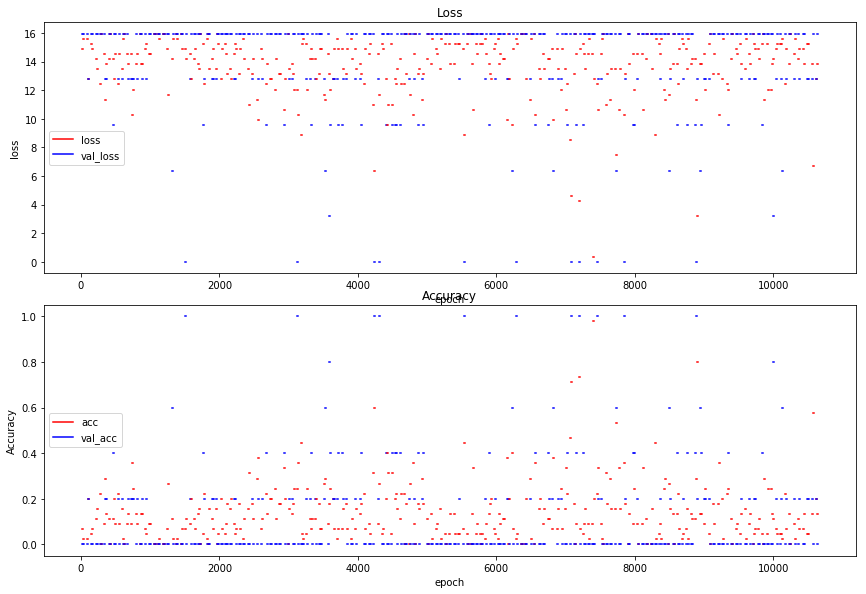

In [15]:
#fit the model
BatchGenerator = generator(X_train, y_train, batch_size=50)
model = create_model()
print(model.summary())
c = 0
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
fig.tight_layout()
for X_trainbatch, y_trainbatch in BatchGenerator:
    c += 1
    print("batch %d" % c)
    history = model.fit(X_trainbatch, y_trainbatch, batch_size=10, epochs=2, validation_split=0.1, verbose=1, shuffle=1)
    
    axs[0].plot(range(2*(c-1), 2*c), history.history['loss'], 'r')
    axs[0].plot(range(2*(c-1), 2*c), history.history['val_loss'], 'b')
    axs[0].set_title("Loss")
    axs[0].legend(['loss', 'val_loss'])
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    
    axs[1].plot(range(2*(c-1), 2*c), history.history['acc'], 'r')
    axs[1].plot(range(2*(c-1), 2*c), history.history['val_acc'], 'b')
    axs[1].set_title("Accuracy")
    axs[1].legend(['acc', 'val_acc'])
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('Accuracy')